In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [50]:

cancer = load_breast_cancer()

In [51]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Question 1

In [52]:
def answer_one():
    data = np.c_[cancer.data, cancer.target]
    columns = np.append(cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)

In [53]:
frame = answer_one()
assert frame.shape == (len(cancer.target), 31)

Question 2

In [54]:
def answer_two():
    cancerdf = answer_one()
    counts = cancerdf.target.value_counts(ascending=True)
    counts.index = "malignant benign".split()
    return counts

In [55]:
output = answer_two()
assert output.malignant == 212
assert output.benign == 357

Question 3

In [56]:
def answer_three():
    cancerdf = answer_one()
    X = cancerdf[cancerdf.columns[:-1]]
    y = cancerdf.target
    return X, y

In [57]:
x, y = answer_three()
assert x.shape == (569, 30)
assert y.shape == (569,)

Question 4

In [58]:
from sklearn.model_selection import train_test_split

def answer_four():
    """splits data into training and testing sets

    Returns:
     tuple(pandas.DataFrame): x_train, y_train, x_test, y_test
    """
    X, y = answer_three()
    return train_test_split(X, y, train_size=426, test_size=143, random_state=0)

In [59]:
x_train, x_test, y_train, y_test = answer_four()
assert x_train.shape == (426, 30)
assert x_test.shape == (143, 30)
assert y_train.shape == (426,)
assert y_test.shape == (143,)

Question 5

In [60]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)
    return model

In [61]:
knn = answer_five()
assert type(knn) == KNeighborsClassifier
assert knn.n_neighbors == 1

Question 6

In [62]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    model = answer_five()
    return model.predict(means)

Question 7

In [63]:
def answer_seven():
    """predicts likelihood of cancer for test set

    Returns:
     numpy.array: vector of predictions
    """
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    return knn.predict(X_test)

In [64]:
predictions = answer_seven()
assert predictions.shape == (143,)
assert set(predictions) == {0.0, 1.0}

In [65]:
print("no cancer: {0}".format(len(predictions[predictions==0])))
print("cancer: {0}".format(len(predictions[predictions==1])))

no cancer: 51
cancer: 92


Question 8

In [66]:
def answer_eight():
    """calculates the mean accuracy of the KNN model

    Returns:
     float: mean accuracy of the model predicting cancer
    """
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    return knn.score(X_test, y_test)

In [67]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y),
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2),
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

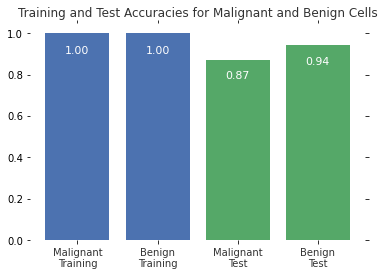

In [68]:
accuracy_plot()